In [1]:
using Revise

In [2]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using Flux
using ProgressMeter
using MLDataPattern
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC
using LearningMPC.Models

INFO: Recompiling stale cache file /home/rdeits/locomotion/explorations/learning-mpc-2/packages/lib/v0.6/LearningMPC.ji for module LearningMPC.


In [3]:
robot = CartPole()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7014...
zmq_url=tcp://127.0.0.1:6014
web_url=http://127.0.0.1:7014/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x00000000073e1cc0, ZMQ.Socket[ZMQ.Socket(Ptr{Void} @0x0000000007398000, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000007352f10, 83, (1, 0), Condition(Any[]), (false, false), 0))]), ZMQ.Socket(Ptr{Void} @0x0000000007398000, Base.Filesystem._FDWatcher(Ptr{Void} @0x0000000007352f10, 83, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7014/static/", "tcp://127.0.0.1:6014", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("slideBar"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x2f, 0x73, 0x6c, 0x69, 0x64, 0x65, 0x42, 0x61, 0x72], Dict("slideBar"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x2f, 0x73, 0x6c, 0x69, 0x64, 0x65, 0x42, 0x61, 0x72], Dict("geometry_1"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"left_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x6c, 0x65, 0x66, 0x74, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("after_slide_to_left_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x6c, 0x65, 0x66, 0x74, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("geometry_5"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x35], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"right_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x69, 0x67, 0x68, 0x74, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("after_slide_to_right_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x69, 0x67, 0x68, 0x74, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("geometry_6"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x36], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"cart"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x65, 0x42, 0x61, 0x72, 0x2f, 0x63, 0x61, 0x72, 0x74], Dict("pole"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x63, 0x61, 0x72, 0x74, 0x2f, 0x70, 0x6f, 0x6c, 0x65], Dict("after_cart_to_pole"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x74, 0x5f, 0x74, 0x6f, 0x5f, 0x70, 0x6f, 0x6c, 0x65], Dict("geometry_3"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String,MeshCat.SceneTrees.SceneNode}()),"geometry_4"=>MeshCat.SceneTrees.SceneNode(UInt8

In [4]:
params = MPCParams(robot)
lqrsol = LQRSolution(robot, params)
net, loss = LearningMPC.interval_net([4, 32, 32, 1])
optimizer = Flux.ADAM(Flux.params(net))

net_cost = LearningMPC.LearnedCost(lqrsol, net)

net_mpc_params = MPCParams(robot)
net_mpc_params.horizon = 1
net_mpc_controller = MPCController(robot, net_mpc_params, net_cost, [lqrsol]);

full_mpc_controller = MPCController(robot, params, lqrsol, [lqrsol, net_mpc_controller]);

In [5]:
sample_sink = LearningMPC.MPCSampleSink{Float64}(true)
playback_sink = LearningMPC.PlaybackSink(mvis, params.Δt)

full_mpc_controller.callback = LearningMPC.call_each(
    sample_sink,
#     playback_sink,
)

live_viewer = LearningMPC.live_viewer(mvis)

dagger_controller = LearningMPC.call_each(
    LearningMPC.dagger_controller(
        full_mpc_controller,
        net_mpc_controller,
        0.2),
    live_viewer
    )

dataset = LearningMPC.Dataset(lqrsol)

x_init = nominal_state(robot)

function collect_into!(data::Vector{<:LearningMPC.Sample})
    empty!(sample_sink)
    LearningMPC.randomize!(x0, x_init, 0.0, 1.0)
    results = LCPSim.simulate(x0, 
        dagger_controller,
        robot.environment, params.Δt, 100, 
        params.lcp_solver;
        termination=x -> configuration(x)[2] > π/2 || configuration(x)[2] < -π/2);
    append!(data, sample_sink.samples)
end

x0 = MechanismState{Float64}(robot.mechanism)

features(s::LearningMPC.Sample) = (s.state, s.mip.objective_bound, s.mip.objective_value)

features (generic function with 1 method)

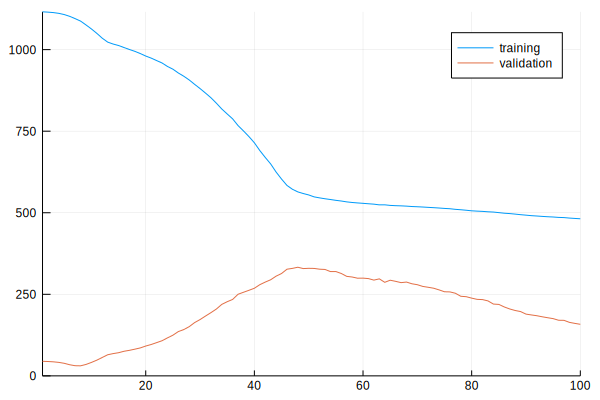

  3.284670 seconds (3.05 M allocations: 181.000 MiB, 2.34% gc time)


Progress:   2%|█                                        |  ETA: 1:00:33

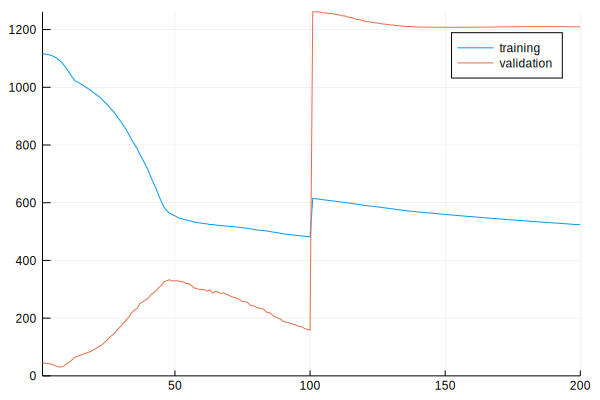

  3.773633 seconds (4.51 M allocations: 293.060 MiB, 2.45% gc time)


Progress:   4%|██                                       |  ETA: 1:15:12

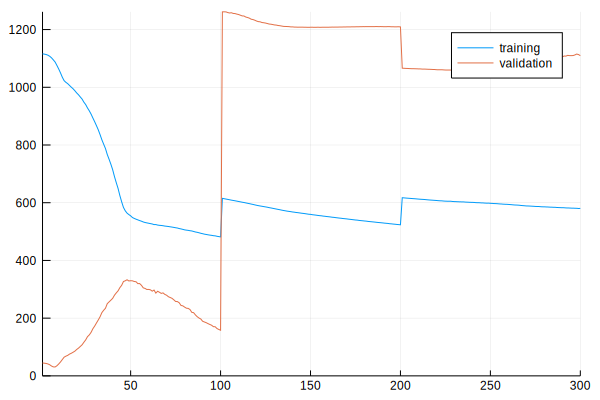

  5.103214 seconds (6.58 M allocations: 428.008 MiB, 2.72% gc time)


Progress:   6%|██                                       |  ETA: 1:31:42

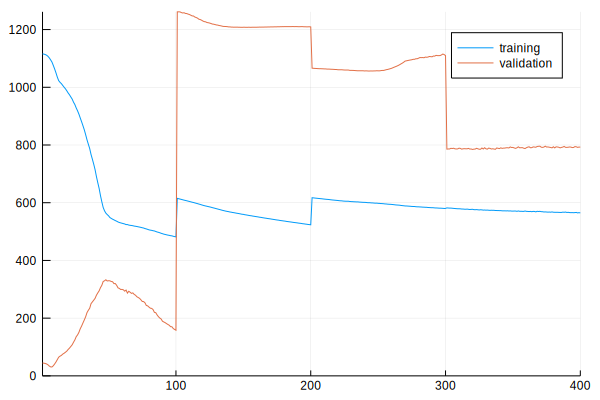

  6.901049 seconds (8.83 M allocations: 575.095 MiB, 2.78% gc time)


Progress:   8%|███                                      |  ETA: 1:26:24

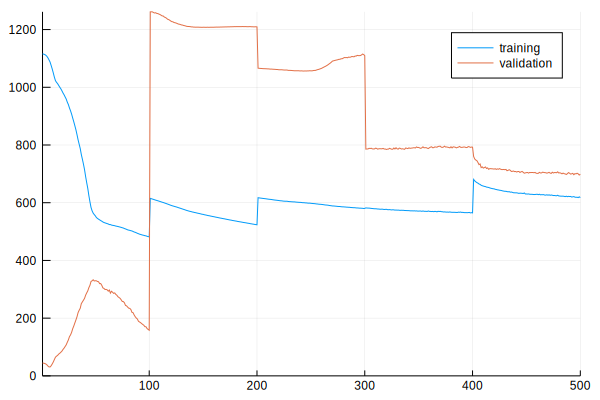

  9.164168 seconds (11.59 M allocations: 753.989 MiB, 2.74% gc time)


Progress:  10%|████                                     |  ETA: 1:16:02

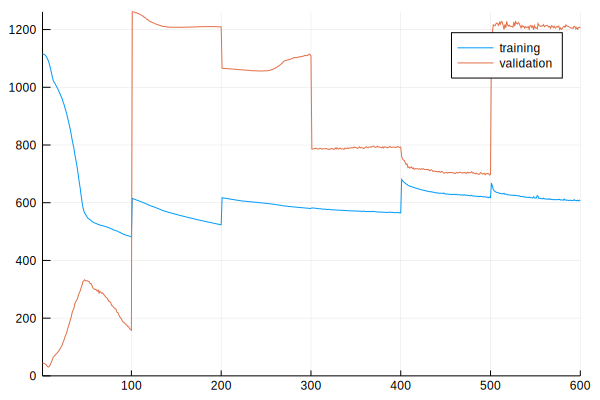

 11.093747 seconds (13.90 M allocations: 903.991 MiB, 2.87% gc time)


Progress:  12%|█████                                    |  ETA: 1:12:31

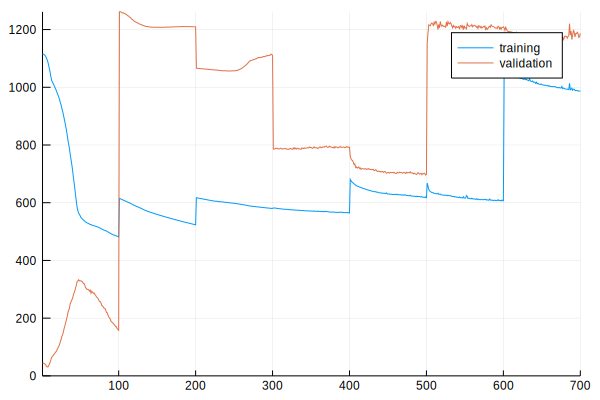

 12.830929 seconds (16.43 M allocations: 1.044 GiB, 2.88% gc time)


Progress:  14%|██████                                   |  ETA: 1:12:31

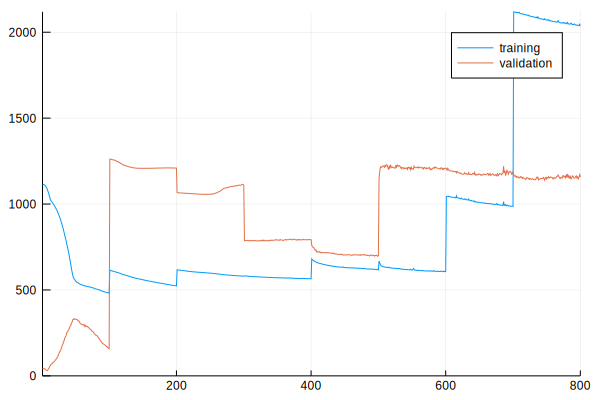

 14.269456 seconds (18.12 M allocations: 1.152 GiB, 2.93% gc time)


Progress:  16%|███████                                  |  ETA: 1:10:38

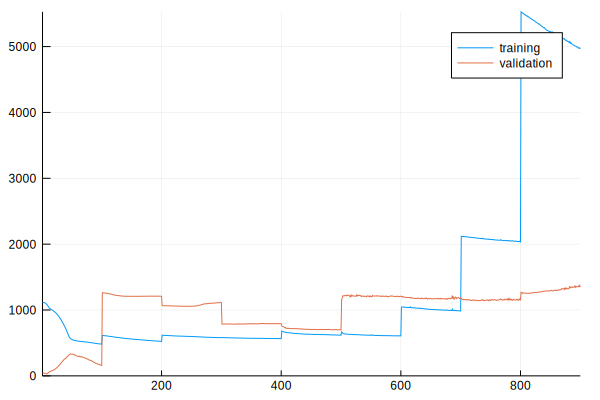

 15.925913 seconds (20.22 M allocations: 1.286 GiB, 2.94% gc time)


Progress:  18%|███████                                  |  ETA: 1:15:20

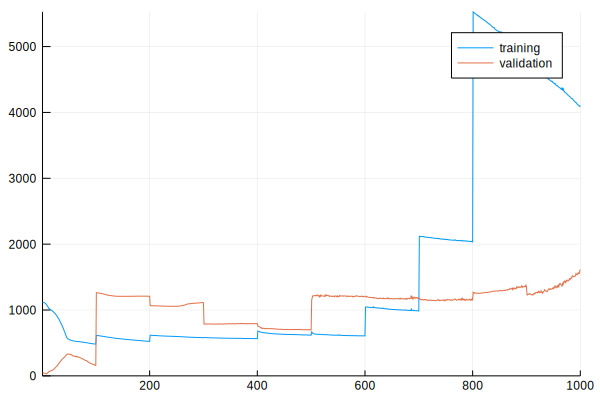

 17.345298 seconds (21.97 M allocations: 1.397 GiB, 2.97% gc time)


Progress:  20%|████████                                 |  ETA: 1:15:49

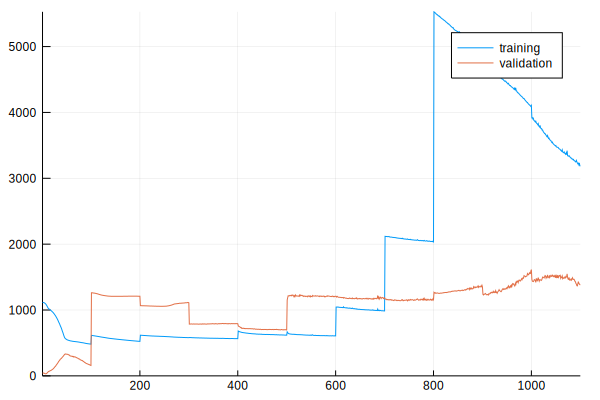

 19.585515 seconds (24.36 M allocations: 1.550 GiB, 3.02% gc time)


Progress:  22%|█████████                                |  ETA: 1:10:51

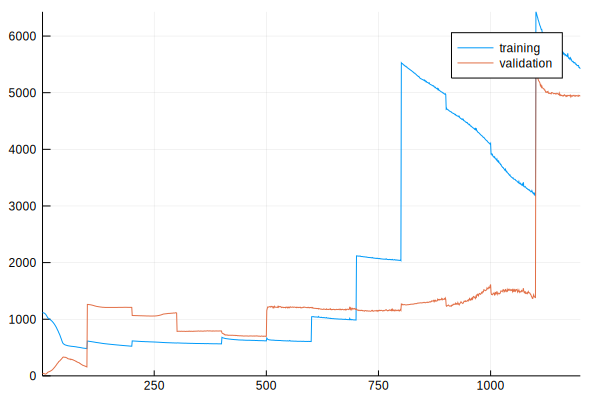

 21.443851 seconds (26.31 M allocations: 1.674 GiB, 3.16% gc time)


Progress:  24%|██████████                               |  ETA: 1:11:17

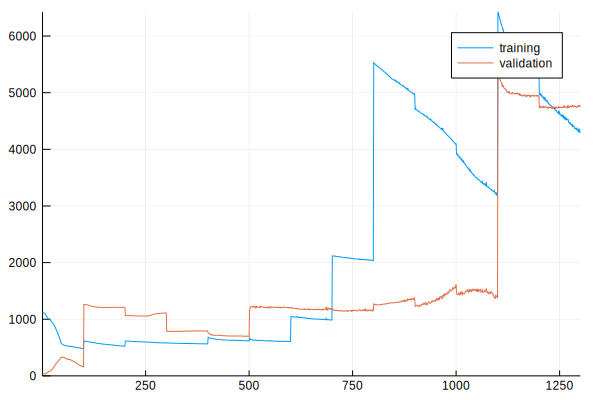

 22.649284 seconds (28.62 M allocations: 1.820 GiB, 3.21% gc time)


Progress:  26%|███████████                              |  ETA: 1:12:46

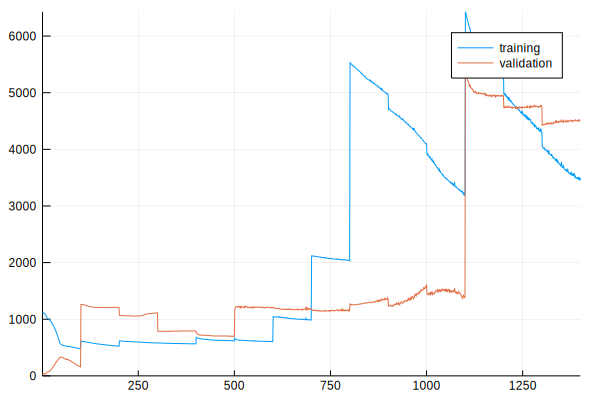

 25.472866 seconds (30.65 M allocations: 1.949 GiB, 3.23% gc time)


Progress:  28%|███████████                              |  ETA: 1:10:39

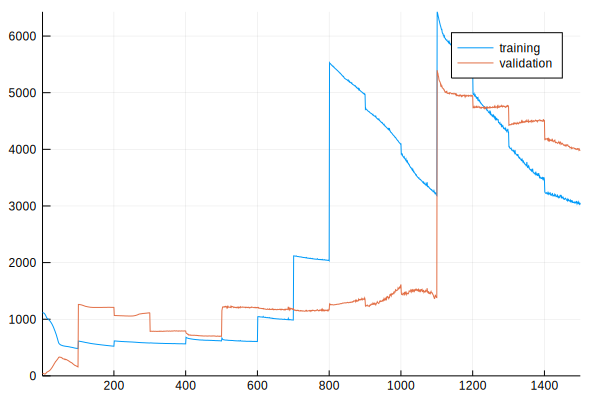

 27.160685 seconds (33.02 M allocations: 2.100 GiB, 3.29% gc time)


Progress:  30%|████████████                             |  ETA: 1:07:34

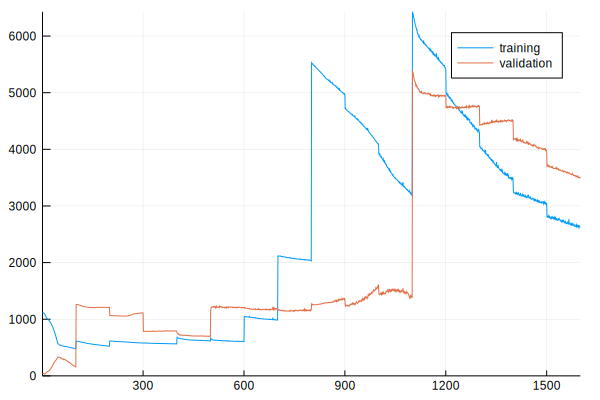

 29.692424 seconds (35.79 M allocations: 2.276 GiB, 3.34% gc time)


Progress:  32%|█████████████                            |  ETA: 1:07:03

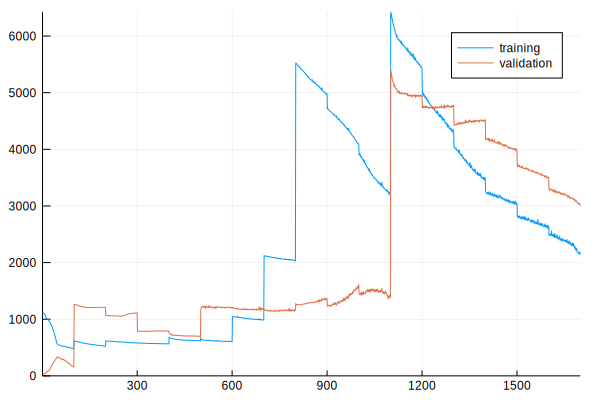

 31.493956 seconds (37.98 M allocations: 2.416 GiB, 3.29% gc time)


Progress:  34%|██████████████                           |  ETA: 1:05:16

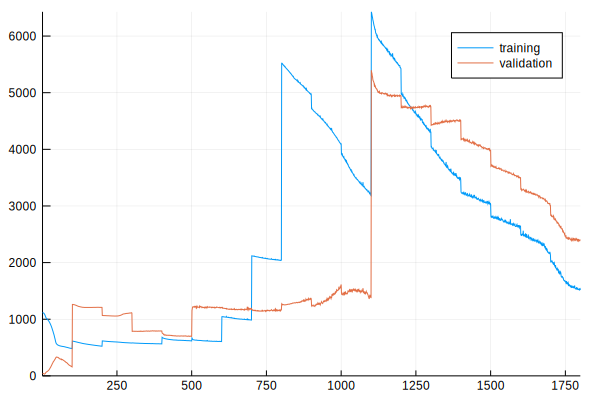

 33.257487 seconds (40.34 M allocations: 2.566 GiB, 3.31% gc time)


Progress:  36%|███████████████                          |  ETA: 1:03:18

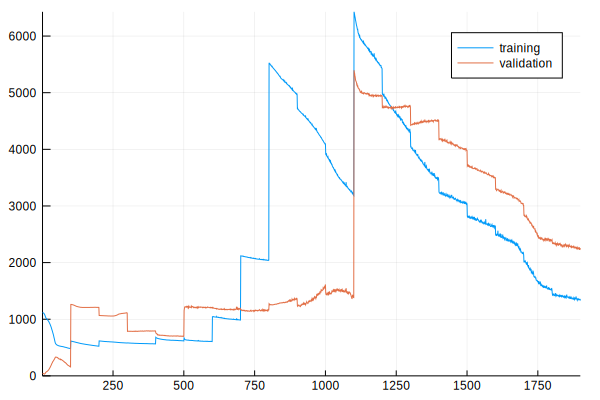

 35.429255 seconds (42.71 M allocations: 2.716 GiB, 3.31% gc time)


Progress:  38%|████████████████                         |  ETA: 1:05:17

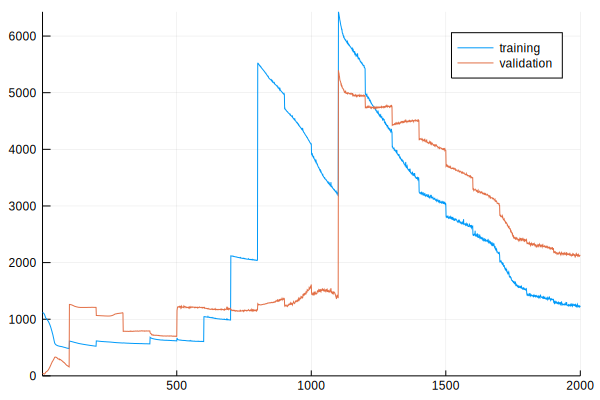

 36.641887 seconds (44.87 M allocations: 2.853 GiB, 2.38% gc time)


Progress:  40%|████████████████                         |  ETA: 1:02:50

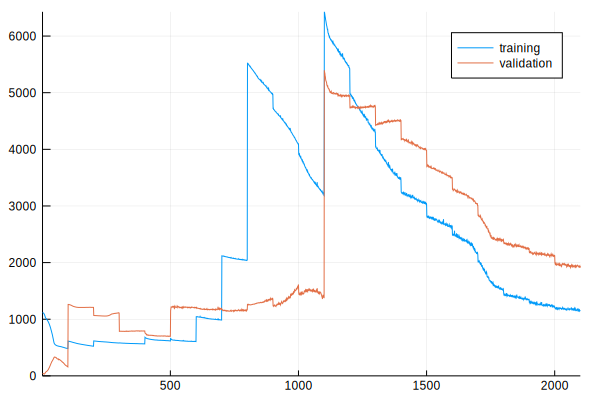

 38.563392 seconds (47.47 M allocations: 3.019 GiB, 2.54% gc time)


Progress:  42%|█████████████████                        |  ETA: 1:03:24

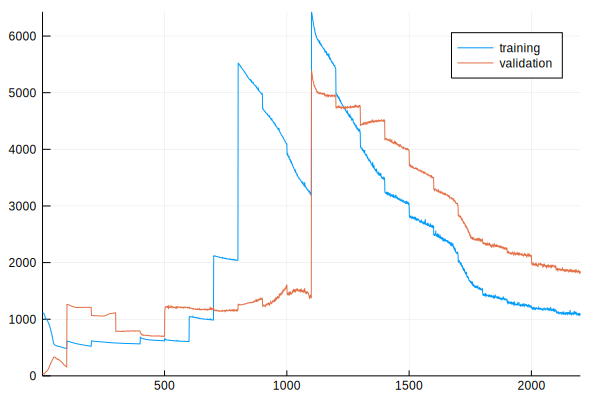

 41.002788 seconds (49.74 M allocations: 3.163 GiB, 2.60% gc time)


Progress:  44%|██████████████████                       |  ETA: 1:00:10

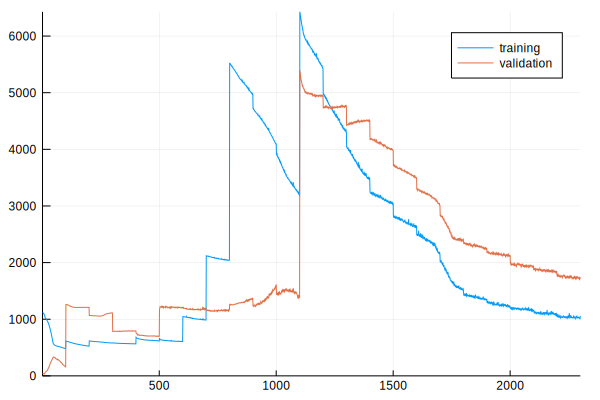

 42.843969 seconds (52.79 M allocations: 3.356 GiB, 2.73% gc time)


Progress:  46%|███████████████████                      |  ETA: 0:58:37

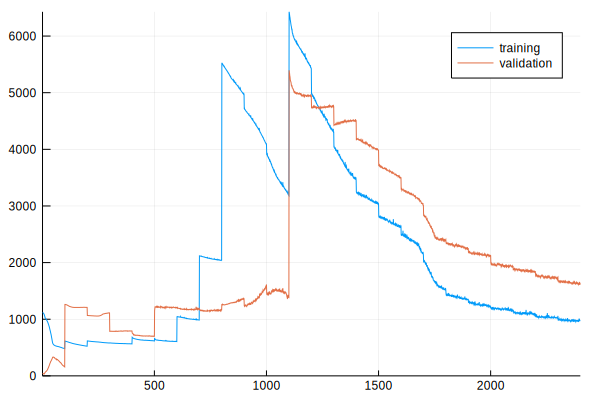

 45.333442 seconds (55.31 M allocations: 3.516 GiB, 2.81% gc time)


Progress:  48%|████████████████████                     |  ETA: 0:58:58

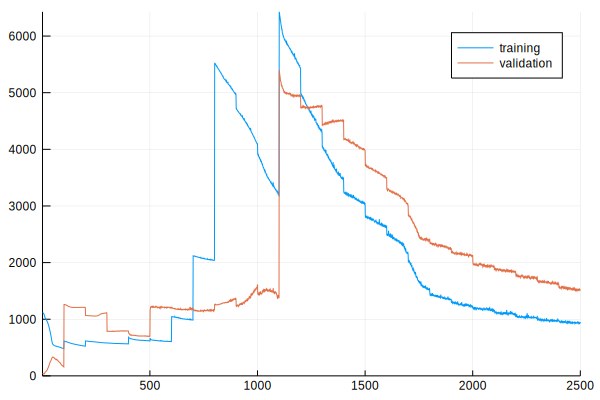

 47.270750 seconds (57.71 M allocations: 3.669 GiB, 2.84% gc time)


Progress:  50%|████████████████████                     |  ETA: 0:56:19

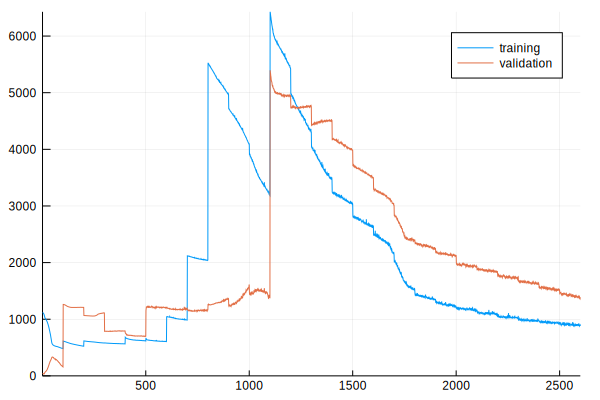

 49.617536 seconds (59.90 M allocations: 3.809 GiB, 2.87% gc time)


Progress:  52%|█████████████████████                    |  ETA: 0:53:13

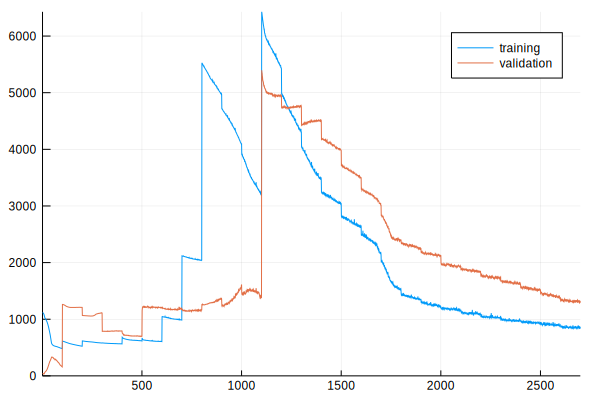

 50.884750 seconds (62.41 M allocations: 3.968 GiB, 2.87% gc time)


Progress:  54%|██████████████████████                   |  ETA: 0:50:53

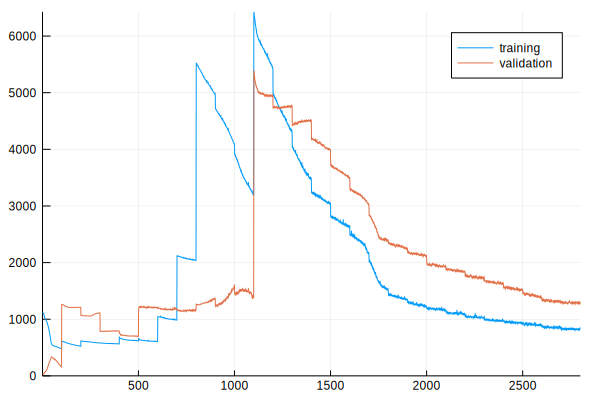

 53.133560 seconds (65.27 M allocations: 4.149 GiB, 2.95% gc time)


Progress:  56%|███████████████████████                  |  ETA: 0:48:56

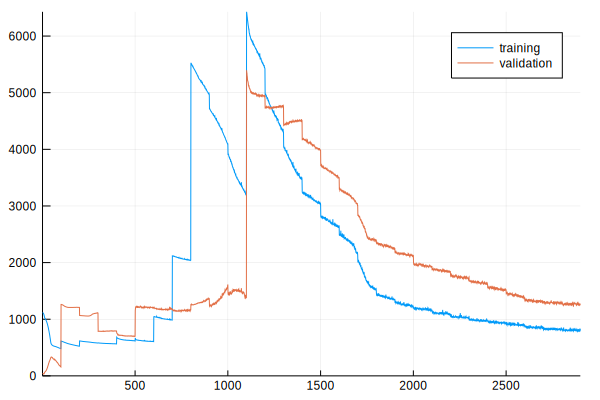

 54.742190 seconds (67.65 M allocations: 4.301 GiB, 3.07% gc time)


Progress:  58%|████████████████████████                 |  ETA: 0:47:09

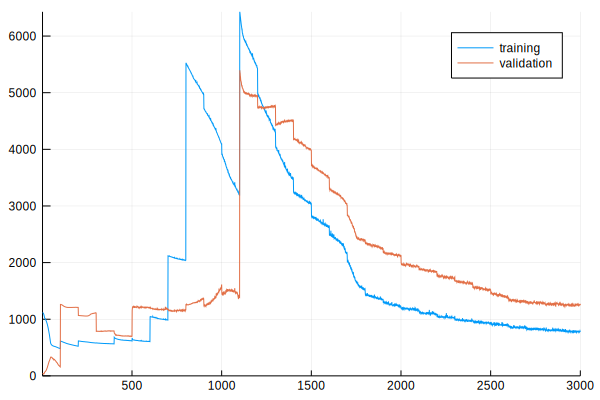

 57.588236 seconds (70.93 M allocations: 4.508 GiB, 3.15% gc time)


Progress:  60%|█████████████████████████                |  ETA: 0:44:54

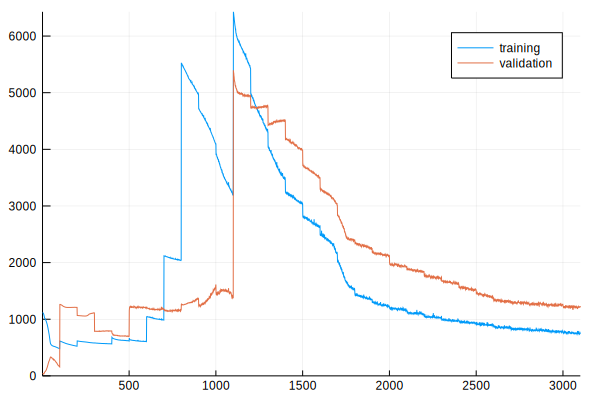

 60.263681 seconds (73.52 M allocations: 4.672 GiB, 3.29% gc time)


Progress:  62%|█████████████████████████                |  ETA: 0:42:31

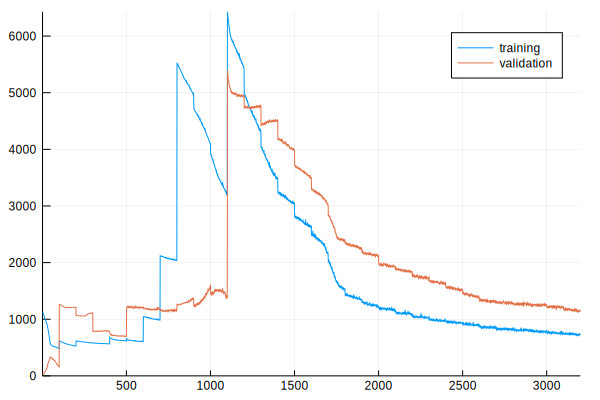

 61.614129 seconds (75.82 M allocations: 4.818 GiB, 3.45% gc time)


Progress:  64%|██████████████████████████               |  ETA: 0:40:13

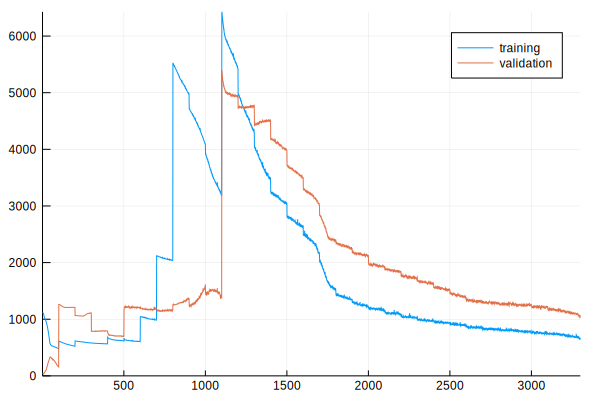

 65.613639 seconds (78.35 M allocations: 4.979 GiB, 3.46% gc time)


Progress:  66%|███████████████████████████              |  ETA: 0:38:56

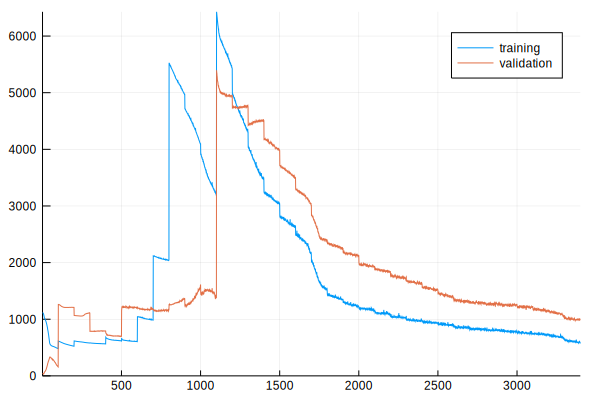

 66.028174 seconds (80.43 M allocations: 5.112 GiB, 3.52% gc time)


Progress:  68%|████████████████████████████             |  ETA: 0:37:20

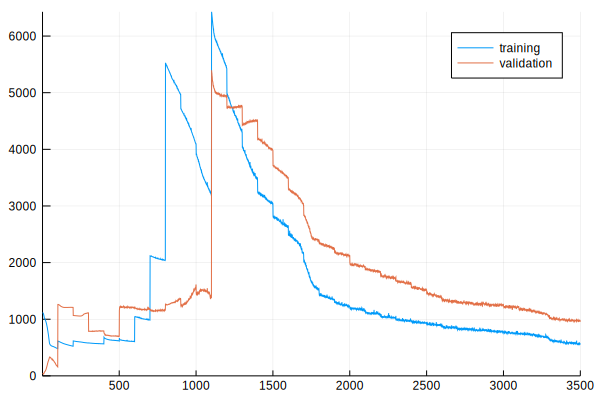

 68.783518 seconds (83.03 M allocations: 5.276 GiB, 3.52% gc time)


Progress:  70%|█████████████████████████████            |  ETA: 0:34:56

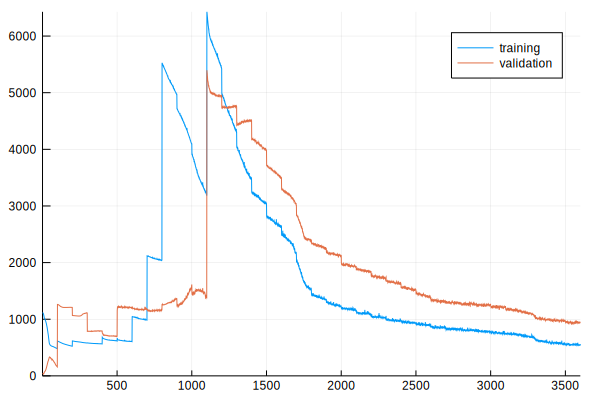

 69.654764 seconds (85.17 M allocations: 5.414 GiB, 3.50% gc time)


Progress:  72%|██████████████████████████████           |  ETA: 0:32:25

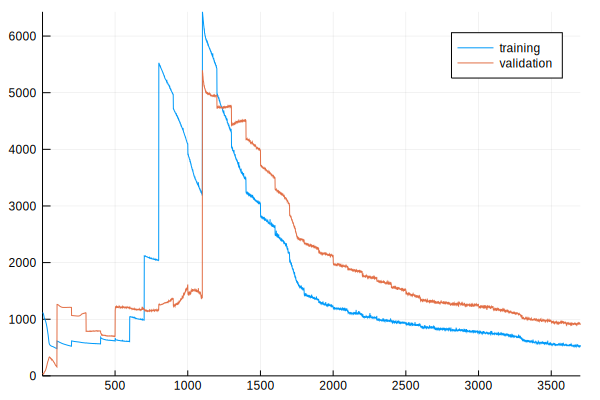

 69.421461 seconds (87.16 M allocations: 5.540 GiB, 2.40% gc time)


Progress:  74%|██████████████████████████████           |  ETA: 0:30:02

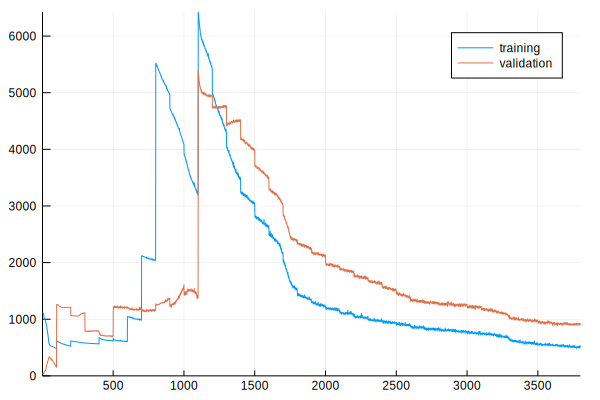

 71.405329 seconds (89.60 M allocations: 5.695 GiB, 2.52% gc time)


Progress:  76%|███████████████████████████████          |  ETA: 0:27:44

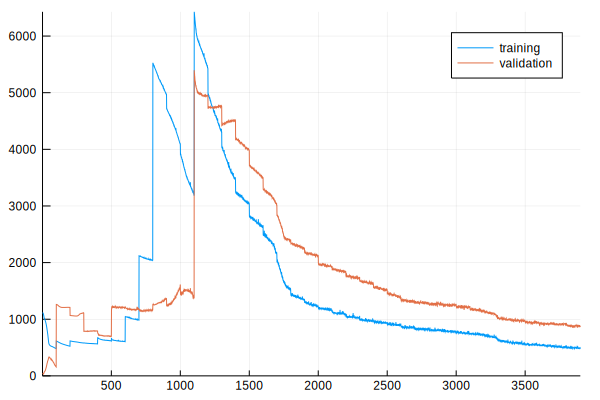

 73.903959 seconds (91.70 M allocations: 5.829 GiB, 2.62% gc time)


Progress:  78%|████████████████████████████████         |  ETA: 0:25:23

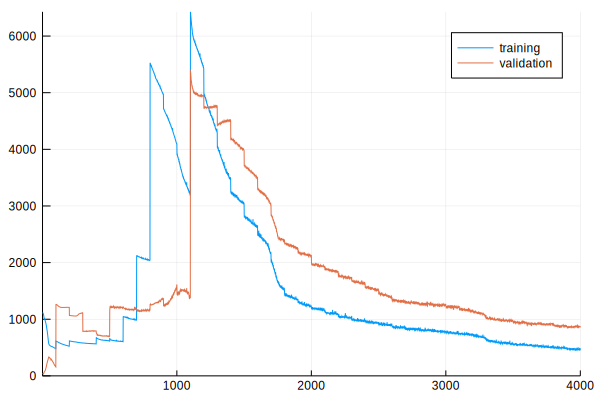

 75.756047 seconds (94.14 M allocations: 5.984 GiB, 2.70% gc time)


Progress:  80%|█████████████████████████████████        |  ETA: 0:22:57

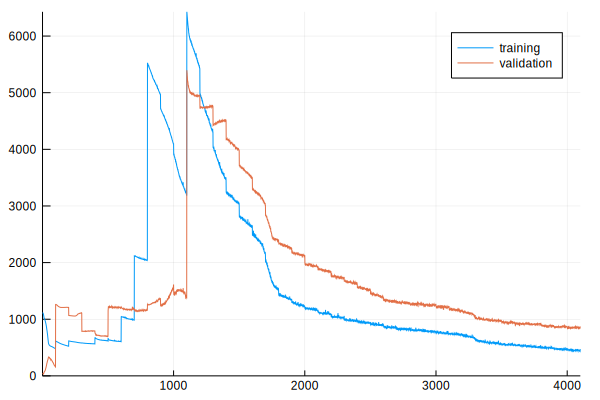

 76.793511 seconds (96.21 M allocations: 6.116 GiB, 2.82% gc time)


Progress:  82%|██████████████████████████████████       |  ETA: 0:20:42

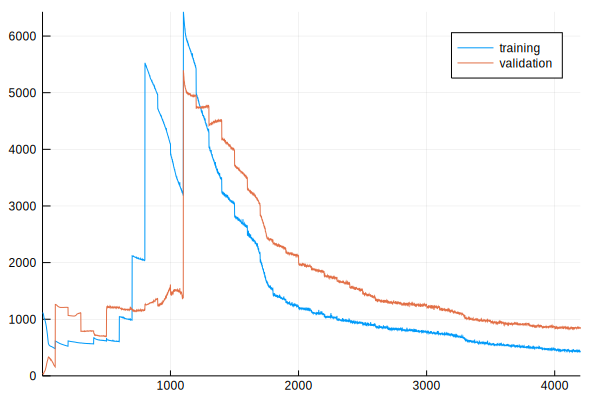

 79.523886 seconds (98.26 M allocations: 6.247 GiB, 2.88% gc time)


Progress:  84%|██████████████████████████████████       |  ETA: 0:18:23

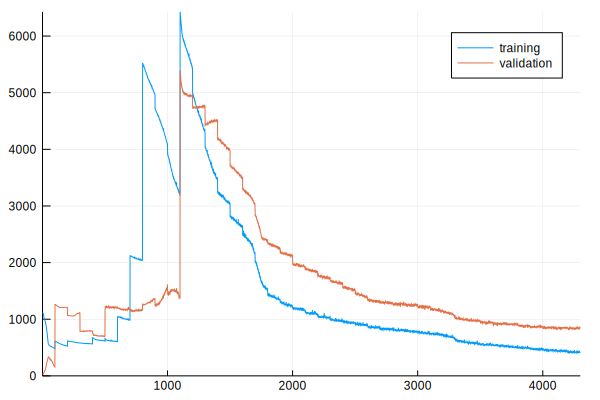

 81.713470 seconds (101.20 M allocations: 6.433 GiB, 2.89% gc time)


Progress:  86%|███████████████████████████████████      |  ETA: 0:16:11

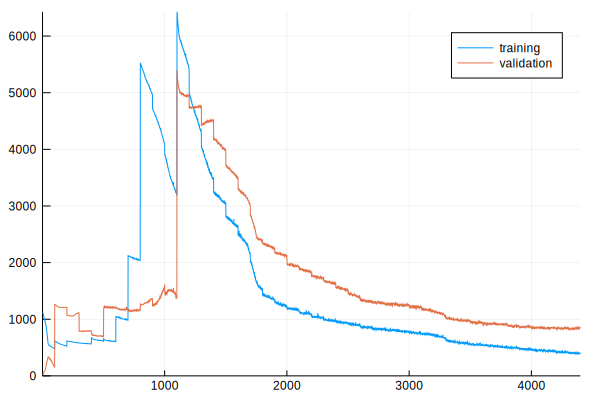

 83.768641 seconds (103.64 M allocations: 6.588 GiB, 2.88% gc time)


Progress:  88%|████████████████████████████████████     |  ETA: 0:13:52

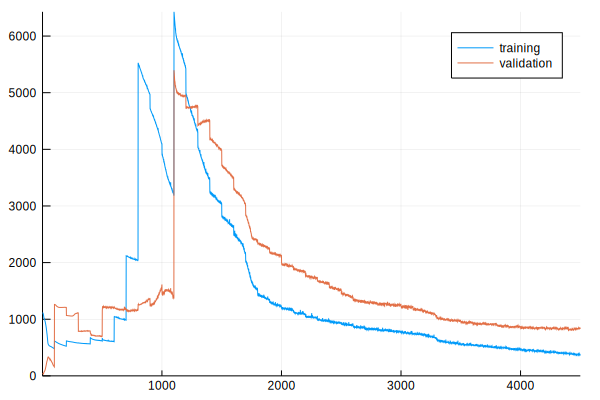

 84.814668 seconds (105.66 M allocations: 6.718 GiB, 2.94% gc time)


Progress:  90%|█████████████████████████████████████    |  ETA: 0:11:33

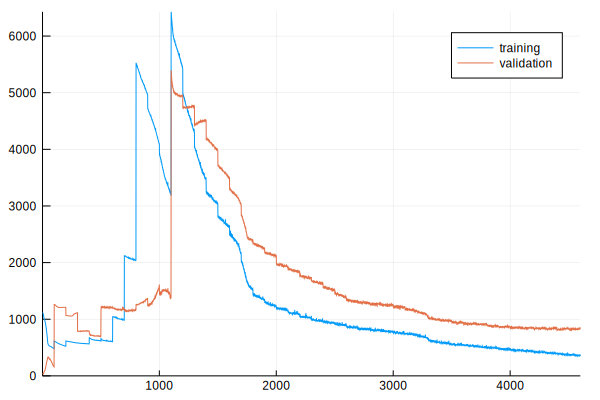

 87.662725 seconds (107.96 M allocations: 6.865 GiB, 2.96% gc time)


Progress:  92%|██████████████████████████████████████   |  ETA: 0:09:15

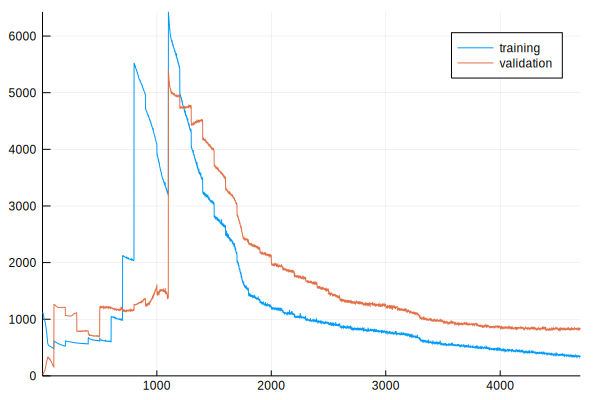

 89.577404 seconds (110.33 M allocations: 7.015 GiB, 3.07% gc time)


Progress:  94%|███████████████████████████████████████  |  ETA: 0:06:55

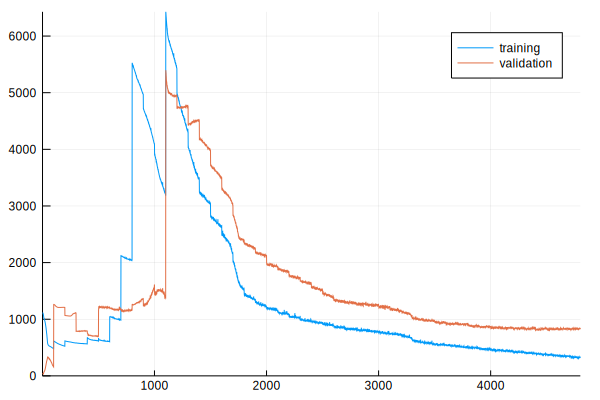

 92.789467 seconds (112.61 M allocations: 7.161 GiB, 3.17% gc time)


Progress:  96%|███████████████████████████████████████  |  ETA: 0:04:37

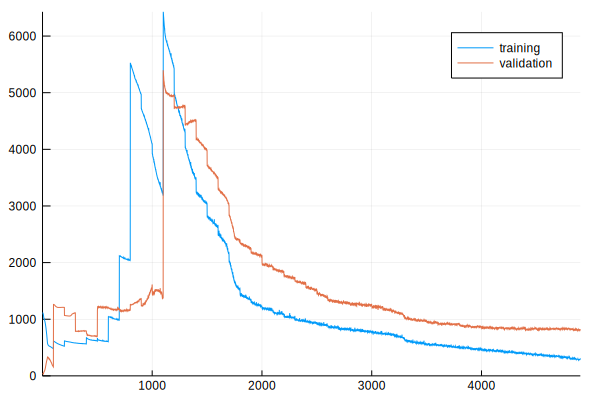

 94.084460 seconds (115.22 M allocations: 7.326 GiB, 3.24% gc time)


Progress:  98%|████████████████████████████████████████ |  ETA: 0:02:19

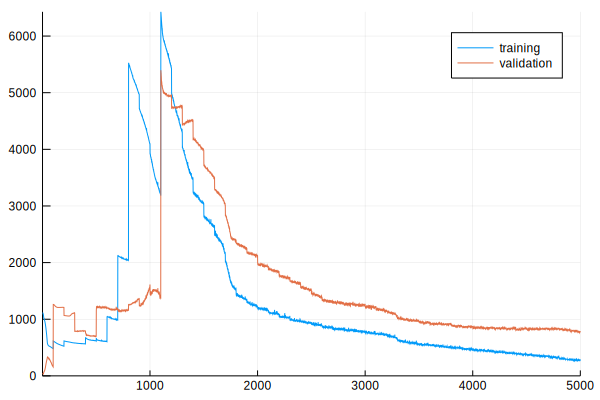

 94.778865 seconds (117.58 M allocations: 7.476 GiB, 2.49% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 1:55:34


In [6]:
datasets = Vector{LearningMPC.Dataset{Float64}}()
all_training_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
all_validation_data = Vector{Tuple{Vector{Float64}, Float64, Float64}}()
losses = Vector{Tuple{Float64, Float64}}()

@showprogress for i in 1:50
    dataset = LearningMPC.Dataset(lqrsol)
    for i in 1:2
        collect_into!(dataset.training_data)
    end
    collect_into!(dataset.testing_data)
    collect_into!(dataset.validation_data)
    append!(all_training_data, features.(dataset.training_data))
    append!(all_validation_data, features.(dataset.validation_data))
    
    @time for i in 1:100
        Flux.train!(loss, shuffleobs(all_training_data), optimizer)
        push!(losses, 
            (mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_training_data),
             mean(xy -> Flux.Tracker.data(loss(xy...)), 
                  all_validation_data)))
    end
    push!(datasets, dataset)
    
    jldopen("cartpole.jld2", "w") do file
        file["datasets"] = datasets
        file["net"] = net
        file["lqrsol"] = lqrsol
        file["mpc_params"] = Dict(
            "Δt" => params.Δt,
            "horizon" => params.horizon,
        )
        file["all_training_data"] = all_training_data
        file["all_validation_data"] = all_validation_data
        file["losses"] = losses
    end
    
    plt = plot(first.(losses), label="training")
    plot!(plt, last.(losses), label="validation")
    ylims!(plt, (0, ylims(plt)[2]))
    display(plt)
end

In [15]:
x0 = nominal_state(robot)
velocity(x0) .= randn(num_velocities(x0))
results = LCPSim.simulate(x0, net_mpc_controller, environment(robot), params.Δt, 500, params.lcp_solver);

In [22]:
set_configuration!(mvis, configuration(results[1].state))

In [24]:
playback(mvis, results, params.Δt)

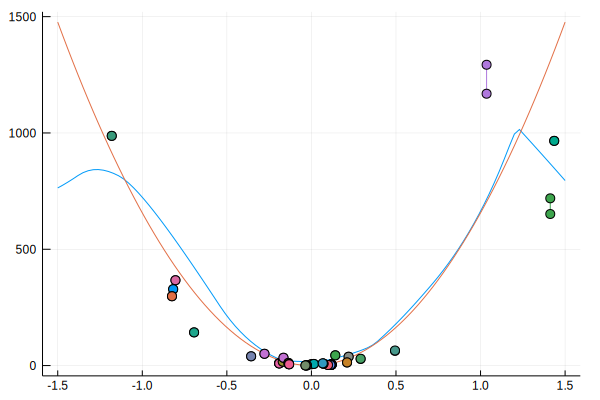

In [18]:
xx = linspace(-1.5, 1.5, 101)
plt = plot(xx, x -> Flux.Tracker.data(net([x, 0, 0, 0]))[], legend=false)
plot!(plt, xx, x -> (s = [x, 0, 0, 0]; (s - lqrsol.x0)' * lqrsol.S * (s - lqrsol.x0)))
for (x, lb, ub) in all_training_data
    if norm(x[2:end]) < 1e-1
        plot!(plt, [x[1], x[1]], [lb, ub], marker=:dot, markersize=5)
    end
end
plt

In [19]:
x0 = nominal_state(robot)
data = map(linspace(-1.5, 1.5, 51)) do x
    set_configuration!(x0, [x, 0])
    r = LearningMPC.run_mpc(x0, environment(robot), params, lqrsol, [lqrsol])
    (x, r.mip.objective_bound, r.mip.objective_value)
end;

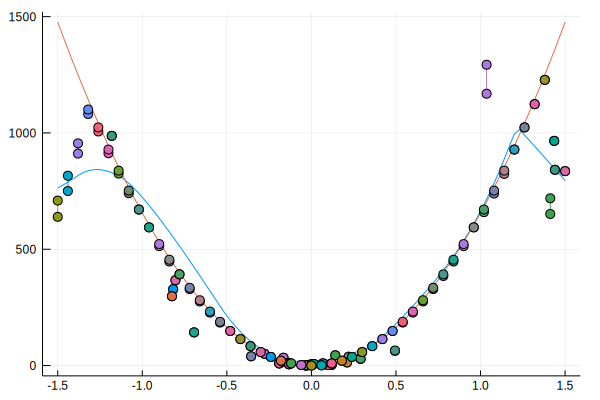

In [20]:
xx = linspace(-1.5, 1.5, 101)
plt = plot(xx, x -> Flux.Tracker.data(net([x, 0, 0, 0]))[], legend=false)
plot!(plt, xx, x -> (s = [x, 0, 0, 0]; (s - lqrsol.x0)' * lqrsol.S * (s - lqrsol.x0)))
for (x, lb, ub) in all_training_data
    if norm(x[2:end]) < 1e-1
        plot!(plt, [x[1], x[1]], [lb, ub], marker=:dot, markersize=5)
    end
end
for (x, lb, ub) in data
    plot!(plt, [x[1], x[1]], [lb, ub], marker=:dot, markersize=5)
end

plt